# MNIST

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## Load dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('train dataset: ', x_train.shape, y_train.shape)
print('test dataset: ', x_test.shape, y_test.shape)

train dataset:  (60000, 28, 28) (60000,)
test dataset:  (10000, 28, 28) (10000,)


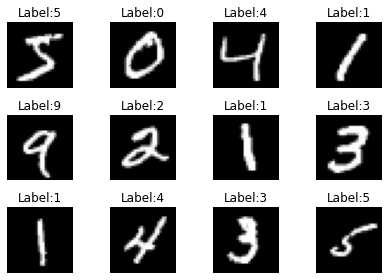

In [ ]:
fig, axes = plt.subplots(3, 4)

for i in range(12):
    ax = axes[i//4, i%4]

    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Label:%s'%str(y_train[i]))

plt.tight_layout()
plt.show()

In [ ]:
x_train[0].reshape(1, 28*28).shape

(1, 784)

In [ ]:
list(range(0, 784))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
# list comprehension
# [f'V{num}' for num in range(0, 784)]

In [ ]:
X_train = pd.DataFrame(x_train.reshape(60000, 784), columns=[f'V{num}' for num in range(0, 784)])
X_train

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.max().max()

255

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2021)

print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (48000, 784) (48000,)
검증 데이터셋:  (12000, 784) (12000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2021)
model.fit(X_tr, y_tr)

RandomForestClassifier(random_state=2021)

In [ ]:
val_pred = model.predict(X_val)

from sklearn.metrics import accuracy_score
print("Accuracy: %0.2f" % accuracy_score(y_val, val_pred))

Accuracy: 0.97


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, random_state=2021)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

X_train_svd = pd.DataFrame(data=X_train_svd, index=X_train.index)
X_train_svd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1657.049948,-47.451842,-308.304811,-93.148204,-512.172722,-243.067899,29.833552,468.050515,-28.993870,-210.579393,132.546433,-284.308463,-25.349700,-705.933248,340.121320,61.331833,-428.043199,101.860965,313.867923,165.021294
1,1753.501349,935.571535,-308.095786,696.171187,-842.843529,-113.367203,194.021977,-142.125621,-57.269419,-147.266887,-286.810396,-5.092037,-294.345755,-176.121490,-235.442597,170.079344,56.977606,46.242216,58.393380,-106.047986
2,800.828305,337.517060,376.987482,-32.373481,299.407243,22.606770,-486.701242,-193.489031,440.142744,101.261156,512.380339,-157.500989,217.084522,-161.428171,-174.010874,166.335895,30.344891,-240.592633,11.359113,-436.692058
3,1050.520538,-733.457316,-595.914486,242.308781,111.556417,693.797962,-298.318423,-462.689177,116.764752,4.900934,-435.776733,-20.271628,275.217002,-184.763456,-154.430248,-38.981915,-62.060539,141.797134,165.751860,128.279315
4,1499.965161,-486.314924,741.070336,-69.949377,-143.648869,33.680140,-19.962563,-387.925450,-270.386796,-90.108056,-250.917302,497.056807,-302.509950,310.906748,46.551968,243.874428,119.200093,-179.023501,58.747550,-255.403902


In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train_svd, y_train, test_size=0.2, stratify=y_train, random_state=2021)

print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (48000, 20) (48000,)
검증 데이터셋:  (12000, 20) (12000,)


In [ ]:
model = RandomForestClassifier(random_state=2021)
model.fit(X_tr, y_tr)

RandomForestClassifier(random_state=2021)

In [ ]:
val_pred = model.predict(X_val)

from sklearn.metrics import accuracy_score
print("Accuracy: %0.2f" % accuracy_score(y_val, val_pred))

Accuracy: 0.95


## 데이터 전처리

In [ ]:
np.max(x_train)

255

In [ ]:
x_train.max()

255

In [ ]:
# 데이터 정규화
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
# Flatten 레이어
print(f'변경전 shape: {x_train.shape}')
print(f'Flatten 적용 후 shape: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후 shape: (60000, 784)


In [ ]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D 변경 후 shape: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D 변경 후 shape: (60000, 784)


## Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(10),
])

In [ ]:
65*10

650

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 2.2913 - accuracy: 0.5034
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2972 - accuracy: 0.4435
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.3641
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.3636
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.3634


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.3625


[2.30259108543396, 0.36250001192092896]

In [ ]:
model.predict(x_test)[0]

array([-1.6814146, -4.1712227, -4.647153 , -2.7295463, -3.4829366,
       -2.3961575, -2.7563024, -0.6197545, -3.5270345, -1.6324301],
      dtype=float32)

In [ ]:
np.argmax(model.predict(x_test), axis=1)

array([7, 0, 8, ..., 9, 5, 6])

In [ ]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

## Activation

### ReLU

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10),
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3205 - accuracy: 0.1594
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3023 - accuracy: 0.1653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3023 - accuracy: 0.1647
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3023 - accuracy: 0.1645
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3012 - accuracy: 0.1347


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2959


2.2959134578704834

In [ ]:
model.predict(x_test)[0]

array([-8.211817 , -3.3115098, -3.2806108, -3.2750006, -2.458736 ,
       -2.2267067, -5.031025 , -3.650516 , -4.1031823, -5.2626395],
      dtype=float32)

In [ ]:
np.argmax(model.predict(x_test), axis=1)

array([5, 5, 1, ..., 5, 4, 1])

In [ ]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

### Softmax

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='elu'),
    # BatchNormalization(),
    Dense(32, activation='elu'),
    # BatchNormalization(),
    # Dropout(0.2),
    Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
             )

In [ ]:
model.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3869 - accuracy: 0.8899 - val_loss: 0.2191 - val_accuracy: 0.9347
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1952 - accuracy: 0.9427 - val_loss: 0.1633 - val_accuracy: 0.9518
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1477 - accuracy: 0.9564 - val_loss: 0.1434 - val_accuracy: 0.9568
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1220 - accuracy: 0.9632 - val_loss: 0.1294 - val_accuracy: 0.9620
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1046 - accuracy: 0.9684 - val_loss: 0.1130 - val_accuracy: 0.9676
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0919 - accuracy: 0.9717 - val_loss: 0.1144 - val_accuracy: 0.9662
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0814 - accuracy: 0.9755 - val_loss: 0.1045 - val_accuracy: 0.9695
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9733


[0.08721013367176056, 0.9732999801635742]

In [ ]:
model.predict(x_test)[0]

array([3.1168429e-06, 2.5791418e-05, 1.3955054e-04, 1.0258520e-03,
       4.2481307e-07, 1.4841433e-05, 7.0864098e-07, 9.9870288e-01,
       1.7427365e-05, 6.9404647e-05], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test), axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

## Metric

### 클래스

In [ ]:
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

### 문자열

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training

In [ ]:
def build_model():

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = build_model()
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2999 - accuracy: 0.9162
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9754
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9730


[0.08477090299129486, 0.9729999899864197]

In [ ]:
model.predict(x_test)[0]

array([1.4068780e-07, 7.6364133e-09, 1.6056920e-06, 3.3556302e-05,
       2.0105516e-10, 6.7937194e-08, 6.7762475e-12, 9.9995840e-01,
       1.9835913e-06, 4.2046768e-06], dtype=float32)

In [ ]:
np.argmax(model.predict(x_test), axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

## Validation

In [ ]:
model = build_model()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    # validation_split=0.1,
                    epochs=10,
                    )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3098 - accuracy: 0.9115 - val_loss: 0.1761 - val_accuracy: 0.9484
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1530 - accuracy: 0.9550 - val_loss: 0.1313 - val_accuracy: 0.9602
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9675 - val_loss: 0.1051 - val_accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.0959 - val_accuracy: 0.9706
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.1028 - val_accuracy: 0.9672
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9823 - val_loss: 0.0902 - val_accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0872 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9719
검증 정확도: 0.9718999862670898


## Visualization

In [ ]:
# history (로그 시각화)

def plot_loss_accuracy(history, epochs: int):

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].plot(range(1, epochs+1),
            history.history['loss'][0:epochs],
            label='train')
    axes[0].plot(range(1, epochs+1),
            history.history['val_loss'][0:epochs],
            label='valid')
    axes[0].set_xlabel('epochs')
    axes[0].set_ylabel('mse')
    axes[0].legend()

    axes[1].plot(range(1, epochs+1),
            history.history['accuracy'][0:epochs],
            label='train')
    axes[1].plot(range(1, epochs+1),
            history.history['val_accuracy'][0:epochs],
            label='valid')
    axes[1].set_xlabel('epochs')
    axes[1].set_ylabel('accuracy')
    axes[1].legend()

    plt.show()

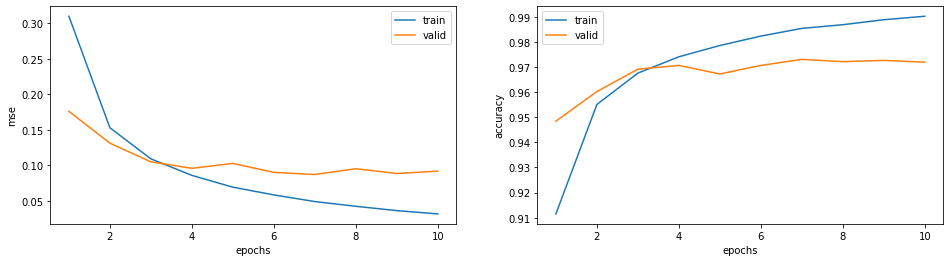

In [ ]:
plot_loss_accuracy(history, epochs=10)

# 겹치는 부분부터 과대적합이 시작 그래서 3-4에서 멈추는게 좋음

## Mini Batch

In [ ]:
model = build_model()
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    batch_size=64,
                    epochs=10,
                    )

# 기본적으로는 크게 가져가는게 GPU

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3728 - accuracy: 0.8960 - val_loss: 0.1770 - val_accuracy: 0.9523
Epoch 2/10
844/844 [==============================] - 2s 3ms/step - loss: 0.1852 - accuracy: 0.9475 - val_loss: 0.1370 - val_accuracy: 0.9612
Epoch 3/10
844/844 [==============================] - 2s 3ms/step - loss: 0.1375 - accuracy: 0.9608 - val_loss: 0.1098 - val_accuracy: 0.9680
Epoch 4/10
844/844 [==============================] - 2s 3ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.1000 - val_accuracy: 0.9728
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.0873 - accuracy: 0.9741 - val_loss: 0.0908 - val_accuracy: 0.9737
Epoch 6/10
844/844 [==============================] - 2s 3ms/step - loss: 0.0729 - accuracy: 0.9787 - val_loss: 0.0904 - val_accuracy: 0.9728
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0878 - val_accuracy: 0.9735
Epoch 

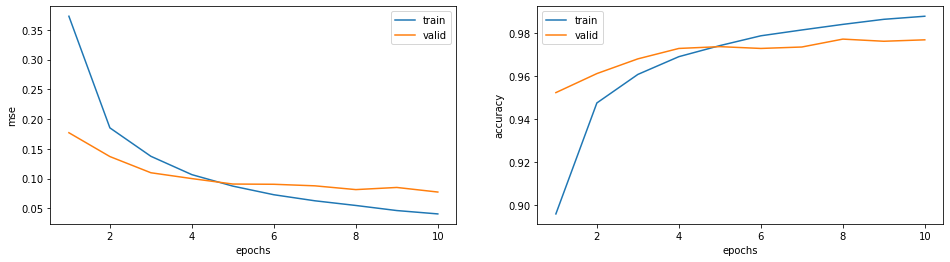

In [ ]:
plot_loss_accuracy(history, epochs=10)

## Convolution

In [ ]:
print("x_train shape:", x_train.shape)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
(1600 + 1)*10

16010

In [ ]:
5*5*64

1600

In [ ]:
(3*3*32 + 1)*64

18496

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    batch_size=64,
                    epochs=10,
                    )

Epoch 1/10
844/844 [==============================] - 10s 4ms/step - loss: 0.2768 - accuracy: 0.9157 - val_loss: 0.0669 - val_accuracy: 0.9817
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0960 - accuracy: 0.9708 - val_loss: 0.0495 - val_accuracy: 0.9870
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0628 - accuracy: 0.9798 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0300 - val_accuracy: 0.9923
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0292 - val_accuracy: 0.9920
Epoch

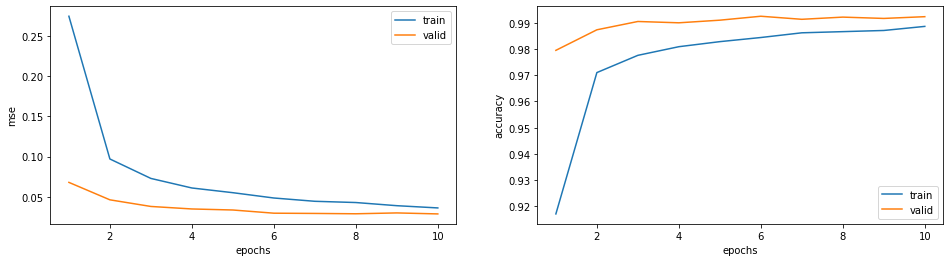

In [ ]:
plot_loss_accuracy(history, epochs=10)

# 실습: Fashion MNIST 데이터셋을 불러와서, 분류 모델을 CNN으로 학습합니다. (10 classes)

In [ ]:
# MNIST DATA
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)
